In [8]:
import pandas as pd

In [9]:
local_file_path = "./data/Winter_medals2022-11-03.csv"
url = "https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Winter_medals2022-11-03.csv"
df = pd.read_csv(url)
df.head(20)

,Country,Year,Gold,Silver,Bronze,Total,Country Code,Population
0,Australia,1994,0,0,1,1,AUS,17855000
1,Australia,1998,0,0,1,1,AUS,18711000
2,Australia,2002,2,0,0,2,AUS,19651400
3,Australia,2006,1,0,1,2,AUS,20697900
4,Australia,2010,2,1,0,3,AUS,22031750
5,Australia,2014,0,2,1,3,AUS,23475686
6,Australia,2018,0,2,1,3,AUS,24982688
7,Australia,2018,0,2,1,3,AUS,24909936
8,Australia,2022,1,2,1,4,AUS,26351036
9,Austria,1988,3,5,2,10,AUT,7585317


In [13]:
#Relevant data without year, country code, population
clean_data = df[["Country","Gold","Silver", "Bronze"]] 
clean_data

,Country,Gold,Silver,Bronze
0,Australia,0,0,1
1,Australia,0,0,1
2,Australia,2,0,0
3,Australia,1,0,1
4,Australia,2,1,0
...,...,...,...,...
268,United States,9,8,6
269,United States,9,8,6
270,United States,8,10,7
271,Uzbekistan,1,0,0


In [15]:
#Add total of medals column by grouping data
grouped_data = clean_data.groupby("Country").sum()
grouped_data["Total"] = grouped_data.sum(axis=1)
grouped_data.head(10)

,Gold,Silver,Bronze,Total
Country,,,,
Australia,6,9,7,22
Austria,51,58,67,176
Belarus,10,8,5,23
Belgium,1,2,2,5
Bulgaria,1,2,2,5
Canada,75,70,71,216
China,23,38,25,86
Croatia,4,6,1,11
Czech Republic,12,13,16,41


In [17]:
#Sort data by highest total of medals descending
grouped_data.sort_values("Total", ascending = False).head(10)

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187
Austria,51,58,67,176
Netherlands,51,40,41,132
Switzerland,49,33,41,123
Italy,33,36,54,123


In [18]:
#Filtering data to find countries with > 10 gold medals and 30 silver medals
grouped_data.loc[(grouped_data["Gold"]>10) & (grouped_data["Silver"]>30)].sort_values("Total", ascending = False).head(20)

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187
Austria,51,58,67,176
Netherlands,51,40,41,132
Italy,33,36,54,123
Switzerland,49,33,41,123


In [20]:
# Sort data for countries with > 10 gold medals and 30 silver medals
grouped_data.loc[(grouped_data["Gold"]>10) & (grouped_data["Silver"]>=30)].sort_values("Total", ascending=False)

,Gold,Silver,Bronze,Total
Country,,,,
Germany,123,117,75,315
Norway,108,93,83,284
United States,82,85,71,238
Canada,75,70,71,216
Russia,57,63,67,187
Austria,51,58,67,176
Netherlands,51,40,41,132
Italy,33,36,54,123
Switzerland,49,33,41,123


In [27]:
!pip3 install numpy
!pip3 install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------------------ --------------- 4.7/7.8 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 18.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 24.8 MB/s eta 0:00:00


In [32]:
import numpy as np
import matplotlib.pyplot as plt

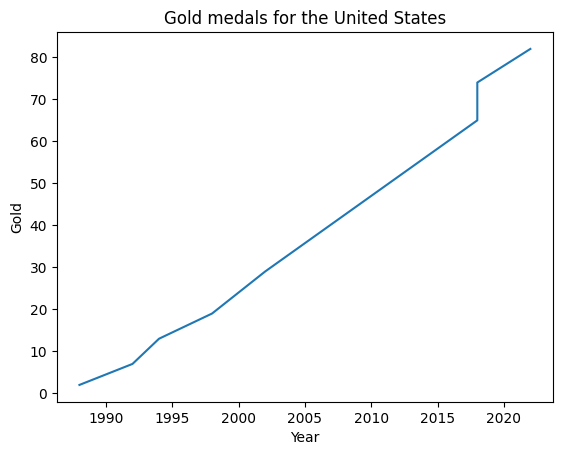

In [36]:
#Plotting number of gold medals secured by the United States each year
us_medals = df.loc[df["Country"] == "United States"]
x = us_medals["Year"]
y = us_medals["Gold"].cumsum()
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Gold")
plt.title("Gold medals for the United States")



Text(0.5, 1.0, 'Medals for China')

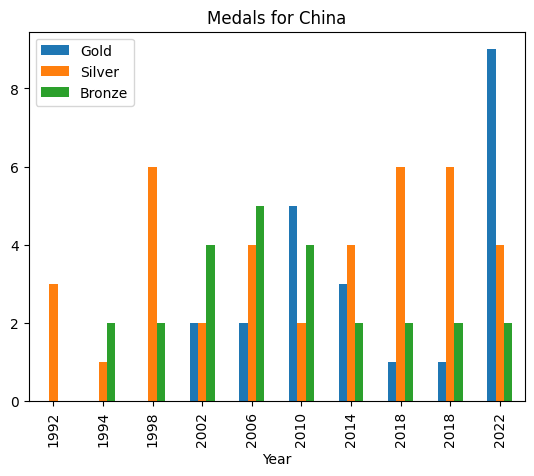

In [40]:
#Barplot for Chineese medals
country = "China"
df \
    .loc[df["Country"] == country] \
    [["Year", "Gold", "Silver", "Bronze"]] \
    .set_index("Year") \
    .plot.bar()
plt.title("Medals for China")

Text(0.5, 0, 'x')

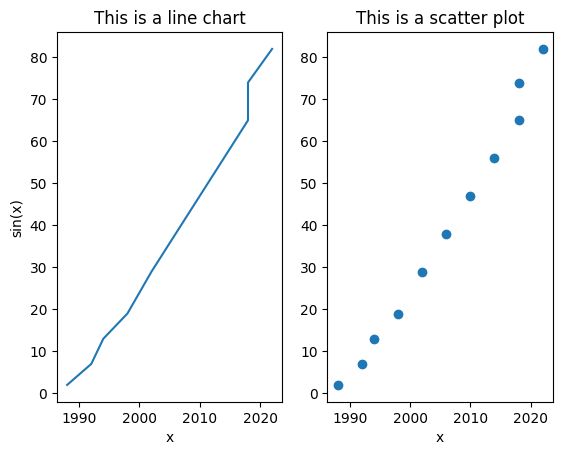

In [41]:
fig, ax = plt.subplots(1,2)

ax[0].plot(x,y)
ax[0].set_title("This is a line chart")
ax[0].set_xlabel("x")
ax[0].set_ylabel("sin(x)")

ax[1].scatter(x,y)
ax[1].set_title("This is a scatter plot")
ax[1].set_xlabel("x")